# The Spark Foundation Internship

## Created By- Sonu Choudhary 

# Prediction using Decision Tree

Task 6:- Create the Decision Tree classifier and visualize it graphically. 

In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score
from sklearn import tree

In [2]:
#Downloading the dataset from the google drive
url="https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df=pd.read_csv(path)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
df.shape

(150, 6)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [24]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [25]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


#  Data Visualization

Text(0, 0.5, 'Count')

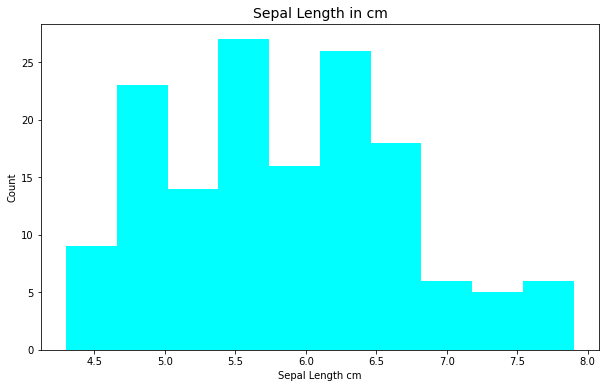

In [26]:
#histogram of Sepal Length
plt.figure(figsize = (10, 6)) 
x = df["SepalLengthCm"] 

plt.hist(x, bins = 10, color = "cyan") 
plt.title("Sepal Length in cm",fontsize=14) 
plt.xlabel("Sepal Length cm") `
plt.ylabel("Count") 


Text(0, 0.5, 'Count')

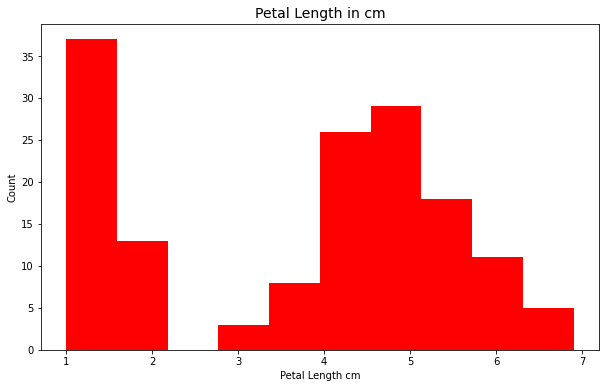

In [27]:
#histogram of Petal Length
plt.figure(figsize = (10, 6)) 
x = df["PetalLengthCm"] 

plt.hist(x, bins = 10, color = "red") 
plt.title("Petal Length in cm",fontsize=14) 
plt.xlabel("Petal Length cm") 
plt.ylabel("Count") 


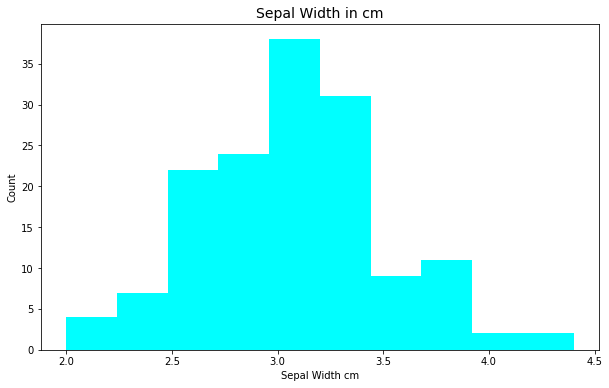

In [28]:
#histogram of Sepal Width

plt.figure(figsize = (10, 6),) 
x = df.SepalWidthCm 

plt.hist(x, bins = 10, color = "cyan") 
plt.title("Sepal Width in cm",fontsize=14) 
plt.xlabel("Sepal Width cm") 
plt.ylabel("Count") 

plt.show() 


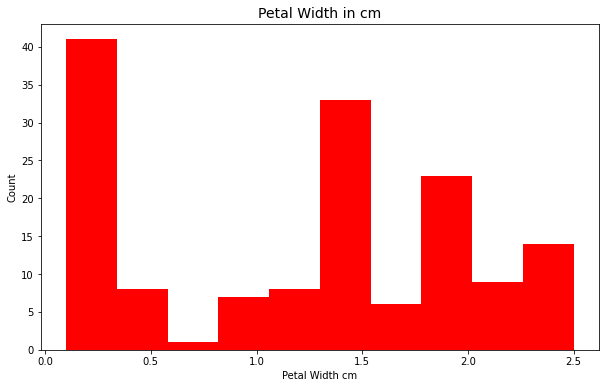

In [29]:
#histogram of Petal Width

plt.figure(figsize = (10, 6)) 
x = df.PetalWidthCm 

plt.hist(x, bins = 10, color = "red") 
plt.title("Petal Width in cm",fontsize=14) 
plt.xlabel("Petal Width cm") 
plt.ylabel("Count") 

plt.show() 

<function matplotlib.pyplot.show(*args, **kw)>

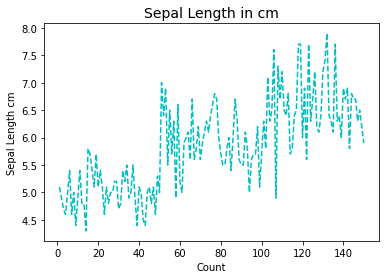

In [30]:
plt.plot(df.Id, df["SepalLengthCm"], "c--") 
plt.title("Sepal Length in cm",fontsize=14) 
plt.ylabel("Sepal Length cm") 
plt.xlabel("Count")
plt.show

Text(0.5, 0, 'Count')

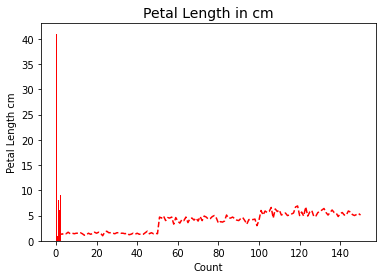

In [31]:
plt.plot(df.Id, df["PetalLengthCm"], "r--") 
plt.hist(x, bins = 10, color = "red") 
plt.title("Petal Length in cm",fontsize=14) 
plt.ylabel("Petal Length cm") 
plt.xlabel("Count") 

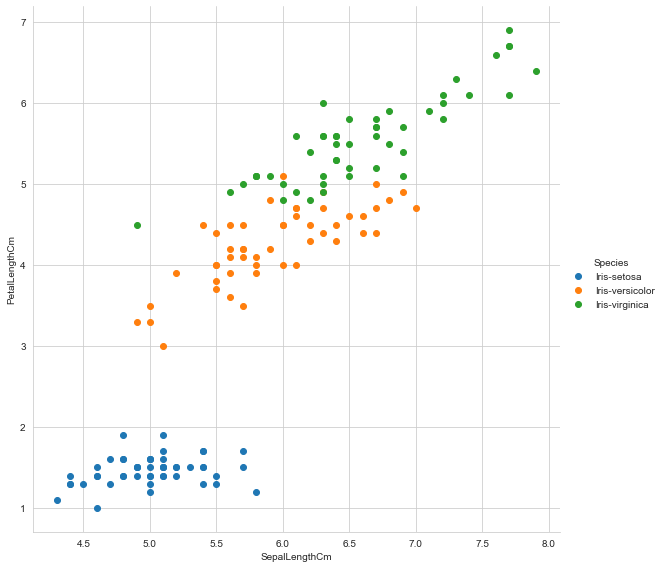

In [32]:
sns.set_style("whitegrid") 
sns.FacetGrid(df, hue ="Species", height = 8).map(plt.scatter,  'SepalLengthCm','PetalLengthCm').add_legend()

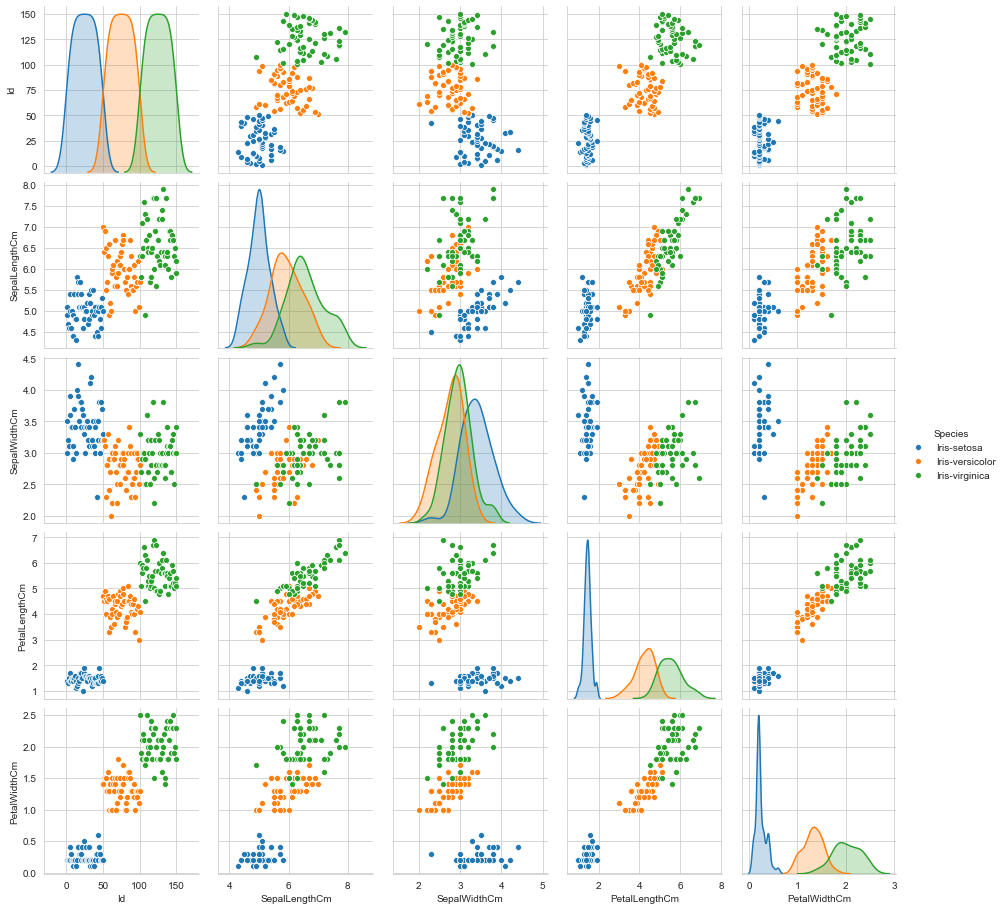

In [33]:
#to visualise all the attributes dependency on each other
sns.pairplot(df,hue="Species") 
sns.set_style("darkgrid");

# Preparing the data¶


In [4]:
X = df.drop('Species',axis=1)
y = df['Species'].map({'Iris-setosa':0 , 'Iris-versicolor':1, 'Iris-virginica':2 })
y= np.array(y)


In [5]:
#Splitting the dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Training the model


In [6]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score
ds_tree=DecisionTreeClassifier(criterion = "entropy")
ds_tree.fit(X_train,y_train)
pred=ds_tree.predict(X_test)

In [7]:
print('accuracy_score: ',accuracy_score(y_test,pred))
print('confusion_matrix:\n',confusion_matrix(y_test,pred))

accuracy_score:  0.9666666666666667
confusion_matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


In [8]:
X_test['Expected_outcome']=y_test
X_test['Predicted_outcome']=pred
X_test

<ipython-input-8-fd0b0a36ff70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Expected_outcome']=y_test
<ipython-input-8-fd0b0a36ff70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Predicted_outcome']=pred


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Expected_outcome,Predicted_outcome
114,115,5.8,2.8,5.1,2.4,2,2
62,63,6.0,2.2,4.0,1.0,1,1
33,34,5.5,4.2,1.4,0.2,0,0
107,108,7.3,2.9,6.3,1.8,2,2
7,8,5.0,3.4,1.5,0.2,0,0
100,101,6.3,3.3,6.0,2.5,2,1
40,41,5.0,3.5,1.3,0.3,0,0
86,87,6.7,3.1,4.7,1.5,1,1
76,77,6.8,2.8,4.8,1.4,1,1
71,72,6.1,2.8,4.0,1.3,1,1


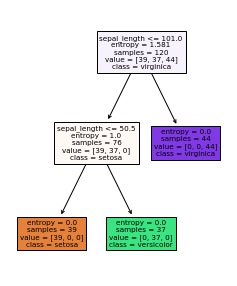

In [21]:
fn=['sepal_length','sepal_width','petal length','petal width']
cn=['setosa', 'versicolor', 'virginica']
fig = plt.figure(figsize=(4,5))
_ = tree.plot_tree(ds_tree, 
                   feature_names=fn,  
                   class_names=cn,
                   filled=True)